In [1]:
import numpy as np
import xarray as xr
from scipy.interpolate import pchip_interpolate

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Alan Wallcraft's hycom grid
#path_in = '/project/oce/bryan/MOM6/inputdata/'
path_in = '/glade/work/bryan/MOM6/InputData/'
file_in = 'mom6_vgrid.nc'
ds_navy = xr.open_dataset(path_in+file_in)
dz_navy = ds_navy['dz'].values
zi_navy = np.append([0.0,],dz_navy.cumsum())
si_navy = ds_navy['sigma2'].values - 1000.

zl_navy = 0.5*(zi_navy[:-1] + zi_navy[1:])
sl_navy = 0.5*(si_navy[:-1] + si_navy[1:])
dsig_navy = si_navy[1:] - si_navy[:-1]

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format(
           'l','zi','zl','dz','si','sl','dsig')
     )
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'
for l,ds in enumerate(dsig_navy):
    print(fmt_str.format(l,zi_navy[l],zl_navy[l],dz_navy[l],si_navy[l],sl_navy[l],dsig_navy[l]))
print(fmt_str.format(l+1,zi_navy[l+1],np.nan,np.nan,si_navy[l+1],np.nan,np.nan))

   l         zi         zl         dz         si         sl       dsig
    0     0.0000     0.5000     1.0000     0.8254     0.9004     0.1500
    1     1.0000     1.9000     1.8000     0.9754     1.0254     0.1001
    2     2.8000     4.4200     3.2400     1.0755     1.1255     0.1001
    3     6.0400     8.3800     4.6800     1.1756     1.2256     0.1002
    4    10.7200    13.1850     4.9300     1.2757     1.3258     0.1002
    5    15.6500    18.5550     5.8100     1.3759     1.4260     0.1002
    6    21.4600    24.8950     6.8700     1.4761     1.5262     0.1002
    7    28.3300    32.3300     8.0000     1.5764     1.6265     0.1003
    8    36.3300    40.3300     8.0000     1.6766     1.7268     0.1003
    9    44.3300    48.3300     8.0000     1.7769     1.8271     0.1003
   10    52.3300    56.3300     8.0000     1.8772     1.9274     0.1003
   11    60.3300    64.3300     8.0000     1.9775     2.0277     0.1003
   12    68.3300    72.3300     8.0000     2.0778     2.1279     

In [3]:
# GFDL OM4 hycom1 grid
#path_in = '/project/oce/bryan/MOM6/inputdata/'
path_in = '/glade/work/bryan/MOM6/InputData/'
file_in = 'hycom1_75_800m.nc'
ds_gfdl = xr.open_dataset(path_in+file_in)
dz_gfdl = ds_gfdl['dz'].values
zi_gfdl = np.append([0.0,],dz_gfdl.cumsum())
si_gfdl = ds_gfdl['sigma2'].values - 1000.

zl_gfdl = 0.5*(zi_gfdl[:-1] + zi_gfdl[1:])
sl_gfdl = 0.5*(si_gfdl[:-1] + si_gfdl[1:])
dsig_gfdl = (si_gfdl[1:] - si_gfdl[:-1])

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format(
           'l','zi','zl','dz','si','sl','dsig')
     )
for l,ds in enumerate(dsig_gfdl):
    print(fmt_str.format(
           l,zi_gfdl[l],zl_gfdl[l],dz_gfdl[l],si_gfdl[l],sl_gfdl[l],dsig_gfdl[l])
         )
print(fmt_str.format(l+1,zi_gfdl[l+1],np.nan,np.nan,si_gfdl[l+1],np.nan,np.nan))

   l         zi         zl         dz         si         sl       dsig
    0     0.0000     1.0000     2.0000    10.0000    12.1517     4.3034
    1     2.0000     3.0000     2.0000    14.3034    16.0561     3.5054
    2     4.0000     5.0000     2.0000    17.8088    19.3259     3.0342
    3     6.0000     7.0000     2.0000    20.8430    22.1998     2.7136
    4     8.0000     9.0000     2.0000    23.5566    24.6848     2.2564
    5    10.0000    11.0000     2.0000    25.8130    26.4203     1.2145
    6    12.0000    13.0000     2.0000    27.0275    27.4694     0.8839
    7    14.0000    15.0000     2.0000    27.9114    28.2768     0.7308
    8    16.0000    17.0000     2.0000    28.6422    28.9609     0.6373
    9    18.0000    19.0000     2.0000    29.2795    29.5658     0.5725
   10    20.0000    21.0000     2.0000    29.8520    30.1141     0.5242
   11    22.0000    23.0000     2.0000    30.3762    30.6194     0.4864
   12    24.0000    25.0000     2.0000    30.8626    31.0904     

In [4]:
# 84 layer grid
path_in = '/glade/work/bryan/MOM6/InputData/'
file_in = 'hybrid_84layer_zstar2.50m-2020-11-12.nc'
ds_84 = xr.open_dataset(path_in+file_in)
dz_84 = ds_84['dz'].values
zi_84 = np.append([0.0,],dz_84.cumsum())
si_84 = ds_84['sigma2'].values - 1000.

zl_84 = 0.5*(zi_84[:-1] + zi_84[1:])
sl_84 = 0.5*(si_84[:-1] + si_84[1:])
dsig_84 = (si_84[1:] - si_84[:-1])

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format(
           'l','zi','zl','dz','si','sl','dsig')
     )
for l,ds in enumerate(dsig_84):
    print(fmt_str.format(
           l,zi_84[l],zl_84[l],dz_84[l],si_84[l],sl_84[l],dsig_84[l])
         )
print(fmt_str.format(l+1,zi_84[l+1],np.nan,np.nan,si_84[l+1],np.nan,np.nan))

   l         zi         zl         dz         si         sl       dsig
    0     0.0000     1.2500     2.5000     7.0000     8.5000     3.0000
    1     2.5000     3.7500     2.5000    10.0000    11.5000     3.0000
    2     5.0000     6.2500     2.5000    13.0000    14.5000     3.0000
    3     7.5000     8.7500     2.5000    16.0000    17.5000     3.0000
    4    10.0000    11.2500     2.5000    19.0000    20.5000     3.0000
    5    12.5000    13.7500     2.5000    22.0000    23.5000     3.0000
    6    15.0000    16.2500     2.5000    25.0000    26.5000     3.0000
    7    17.5000    18.7500     2.5000    28.0000    28.3750     0.7500
    8    20.0000    21.2500     2.5000    28.7500    28.8750     0.2500
    9    22.5000    23.7500     2.5000    29.0000    29.1250     0.2500
   10    25.0000    26.2500     2.5000    29.2500    29.3750     0.2500
   11    27.5000    28.7500     2.5000    29.5000    29.6250     0.2500
   12    30.0000    31.2500     2.5000    29.7500    29.8750     

### Stretch out the layers between sigma2=36 and 38

In [5]:
ntotal = len(sl_84)
ntarget = 75
nsubtract = ntotal - ntarget
print(' # to subtract = ',nsubtract)

sig_crit = 35.0
sig_range = si_84.max() - sig_crit
print(' sigma2 interface range in deep = ',sig_crit,' to ',sig_range)
deep_subset = np.where(sl_84 > sig_crit)[0]
print(' index in sigma2 range = ',deep_subset)

ndeep = len(deep_subset)
nupper = len(dsig_84) - ndeep
print(' # of original upper layers = ',nupper,' # deep layers = ',ndeep, ' # total = ',nupper+ndeep)
dsig_deep = dsig_84[deep_subset]
si_deep = si_84[-ndeep+1:]
ndeep_target = ndeep - nsubtract
nupper_target = ntarget - ndeep_target
print(' # of target upper layers = ',nupper_target,' # deep layers = ',ndeep_target)

 # to subtract =  9
 sigma2 interface range in deep =  35.0  to  3.0
 index in sigma2 range =  [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83]
 # of original upper layers =  34  # deep layers =  50  # total =  84
 # of target upper layers =  34  # deep layers =  41


In [6]:
si_new = np.zeros(ntarget+1)
dsig_new = np.zeros(ntarget)
zi_new = np.zeros(ntarget+1)
dz_new = np.zeros(ntarget)

si_new[:nupper+1] = si_84[:nupper+1]
dsig_new[:nupper] = dsig_84[:nupper]

zi_new[:nupper+1] = zi_84[:nupper+1]
dz_new[:nupper] = dz_84[:nupper]

In [7]:
alpha = 1.48615
a = (alpha - 1.0)/float(ntarget-nupper)
b = (float(ntarget - alpha*nupper)/(float(ntarget - nupper)))
print(alpha,a,b)

for l in range(nupper,ntarget):
    fac = a*l + b
    sl_target = si_new[l] + dsig_new[l-1]*0.5
    dsig_new[l] = pchip_interpolate(sl_84,dsig_84,sl_target)*fac
    si_new[l+1] = si_new[l] + dsig_new[l]
#    print(l,fac,sl_target,si_new[l],dsig_new[l],si_new[l+1])

1.48615 0.011857317073170734 0.5968512195121951


In [8]:
alpha = 1.45
a = (alpha - 1.0)/float(ntarget-nupper)
b = (float(ntarget - alpha*nupper)/(float(ntarget - nupper)))
print(alpha,a,b)

for l in range(nupper,ntarget):
    fac = a*l + b
    zl_target = zi_new[l] + dz_new[l-1]*0.5
    dz_new[l] = pchip_interpolate(zl_84,dz_84,zl_target)*fac
    zi_new[l+1] = zi_new[l] + dz_new[l]
#    print(l,fac,zl_target,zi_new[l],dz_new[l],zi_new[l+1])

1.45 0.01097560975609756 0.626829268292683


In [9]:
sl_new = 0.5*(si_new[:-1] + si_new[1:])
zl_new = 0.5*(zi_new[:-1] + zi_new[1:])

In [10]:
print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format(
           'l','zi','zl','dz','si','sl','dsig')
     )
for l,ds in enumerate(dsig_new):
    print(fmt_str.format(
           l,zi_new[l],zl_new[l],dz_new[l],si_new[l],sl_new[l],dsig_new[l])
         )
print(fmt_str.format(l+1,zi_new[l+1],np.nan,np.nan,si_new[l+1],np.nan,np.nan))

   l         zi         zl         dz         si         sl       dsig
    0     0.0000     1.2500     2.5000     7.0000     8.5000     3.0000
    1     2.5000     3.7500     2.5000    10.0000    11.5000     3.0000
    2     5.0000     6.2500     2.5000    13.0000    14.5000     3.0000
    3     7.5000     8.7500     2.5000    16.0000    17.5000     3.0000
    4    10.0000    11.2500     2.5000    19.0000    20.5000     3.0000
    5    12.5000    13.7500     2.5000    22.0000    23.5000     3.0000
    6    15.0000    16.2500     2.5000    25.0000    26.5000     3.0000
    7    17.5000    18.7500     2.5000    28.0000    28.3750     0.7500
    8    20.0000    21.2500     2.5000    28.7500    28.8750     0.2500
    9    22.5000    23.7500     2.5000    29.0000    29.1250     0.2500
   10    25.0000    26.2500     2.5000    29.2500    29.3750     0.2500
   11    27.5000    28.7500     2.5000    29.5000    29.6250     0.2500
   12    30.0000    31.2500     2.5000    29.7500    29.8750     

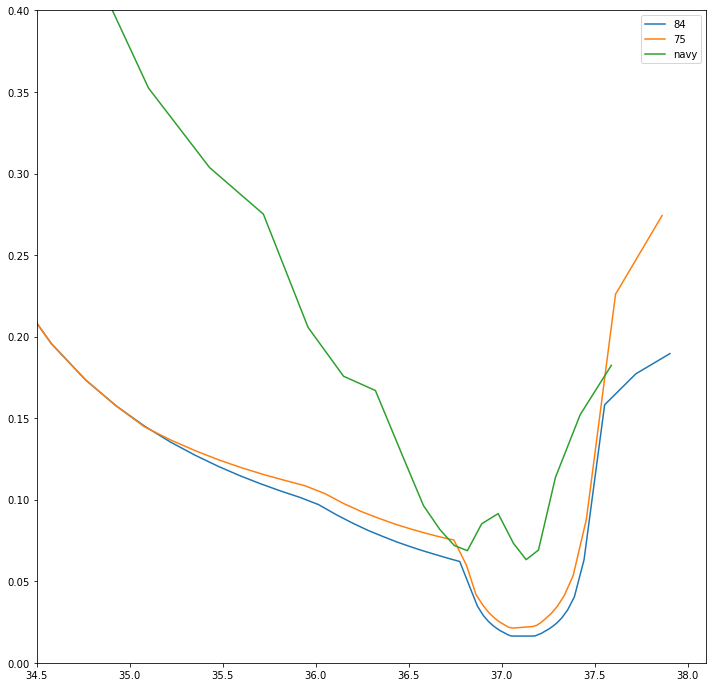

In [11]:
fig,ax=plt.subplots(figsize=(12,12))
ax.plot(sl_84,dsig_84,label='84')
ax.plot(sl_new,dsig_new,label='75')
ax.plot(sl_navy,dsig_navy,label='navy')
#ax.plot(sl_gfdl,dsig_gfdl,label='gfdl')
ax.set_xlim(34.5,38.1)
ax.set_ylim(0,0.4)
ax.legend()

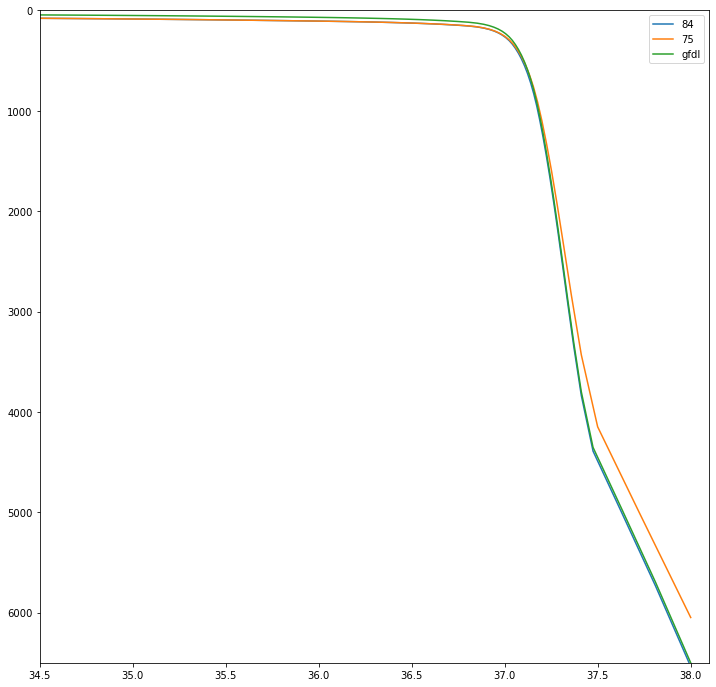

In [17]:
fig,ax=plt.subplots(figsize=(12,12))
ax.plot(si_84,zi_84,label='84')
ax.plot(si_new,zi_new,label='75')
ax.plot(si_gfdl,zi_gfdl,label='gfdl')
ax.set_xlim(34.5,38.1)
ax.set_ylim(6500,0)
ax.legend()

In [13]:
print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format(
           'l','zi','zl','dz','si','sl','dsig')
     )
for l,ds in enumerate(dsig_new):
    print(fmt_str.format(l,zi_new[l],zl_new[l],dz_new[l],si_new[l],sl_new[l],dsig_new[l]))
print(fmt_str.format(l+1,zi_new[l+1],np.nan,np.nan,si_new[l+1],np.nan,np.nan))

   l         zi         zl         dz         si         sl       dsig
    0     0.0000     1.2500     2.5000     7.0000     8.5000     3.0000
    1     2.5000     3.7500     2.5000    10.0000    11.5000     3.0000
    2     5.0000     6.2500     2.5000    13.0000    14.5000     3.0000
    3     7.5000     8.7500     2.5000    16.0000    17.5000     3.0000
    4    10.0000    11.2500     2.5000    19.0000    20.5000     3.0000
    5    12.5000    13.7500     2.5000    22.0000    23.5000     3.0000
    6    15.0000    16.2500     2.5000    25.0000    26.5000     3.0000
    7    17.5000    18.7500     2.5000    28.0000    28.3750     0.7500
    8    20.0000    21.2500     2.5000    28.7500    28.8750     0.2500
    9    22.5000    23.7500     2.5000    29.0000    29.1250     0.2500
   10    25.0000    26.2500     2.5000    29.2500    29.3750     0.2500
   11    27.5000    28.7500     2.5000    29.5000    29.6250     0.2500
   12    30.0000    31.2500     2.5000    29.7500    29.8750     

In [14]:
from datetime import datetime 
now=datetime.now()
print(now)

path_out = '/glade/work/bryan/MOM6/InputData/'

si_da = xr.DataArray(si_new+1000.0,
             dims=["interfaces"],
            attrs={"units":"kg/m^3","long_name":"Interface target potential density referenced to 2000db"})
dz_da = xr.DataArray(dz_new,
                     dims=["layers"],
                     attrs={"units":"m","long_name":"z* coordinate level thickness"})

ds_out = xr.Dataset()
ds_out['dz'] = dz_da
ds_out['sigma2'] = si_da
ds_out.attrs={'history':'Created '+str(now)+' with coarsen_84_to74layer.ipynb'}

ds_out

2020-12-04 08:41:41.733514


<xarray.Dataset>
Dimensions:  (interfaces: 76, layers: 75)
Dimensions without coordinates: interfaces, layers
Data variables:
    dz       (layers) float64 2.5 2.5 2.5 2.5 ... 595.1 717.5 863.4 1.037e+03
    sigma2   (interfaces) float64 1.007e+03 1.01e+03 ... 1.038e+03 1.038e+03
Attributes:
    history:  Created 2020-12-04 08:41:41.733514 with coarsen_84_to74layer.ipynb

In [15]:
today=str(now)[0:10]
nk = len(zl_new)
dz_min = dz_new.min()

file_out = "hybrid_{:d}layer_zstar{:4.2f}m-{:9s}.nc".format(nk,dz_min,today)
file_out

'hybrid_75layer_zstar2.50m-2020-12-04.nc'